In [1]:
from openbb import obb
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)
plt.style.use("dark_background")
pd.set_option('display.max_columns', None)

from dotenv import dotenv_values

config = dotenv_values(".env") 
obb.account.login(pat=config['OPENBB_PAT'])

import libs.utils
import datetime
import math

In [2]:
start_date = '2018-01-01'#'1999-01-01'
end_date = '2019-01-01'

In [4]:
trates = obb.fixedincome.government.treasury_rates(start_date=start_date, end_date=end_date, provider='federal_reserve').to_dataframe()
trates.fillna(0, inplace=True)
#trates.head()
trates

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30
date,,,,,,,,,,,
2018-01-02,0.0129,0.0144,0.0161,0.0183,0.0192,0.0201,0.0225,0.0238,0.0246,0.0264,0.0281
2018-01-03,0.0129,0.0141,0.0159,0.0181,0.0194,0.0202,0.0225,0.0237,0.0244,0.0262,0.0278
2018-01-04,0.0128,0.0141,0.0160,0.0182,0.0196,0.0205,0.0227,0.0238,0.0246,0.0262,0.0279
2018-01-05,0.0127,0.0139,0.0158,0.0180,0.0196,0.0206,0.0229,0.0240,0.0247,0.0264,0.0281
2018-01-08,0.0130,0.0145,0.0160,0.0179,0.0196,0.0207,0.0229,0.0241,0.0249,0.0265,0.0281
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.0242,0.0245,0.0252,0.0261,0.0255,0.0256,0.0258,0.0266,0.0274,0.0288,0.0300
2018-12-26,0.0241,0.0244,0.0254,0.0261,0.0261,0.0260,0.0267,0.0274,0.0281,0.0294,0.0306
2018-12-27,0.0243,0.0241,0.0249,0.0258,0.0256,0.0255,0.0260,0.0268,0.0277,0.0292,0.0305


<Axes: >

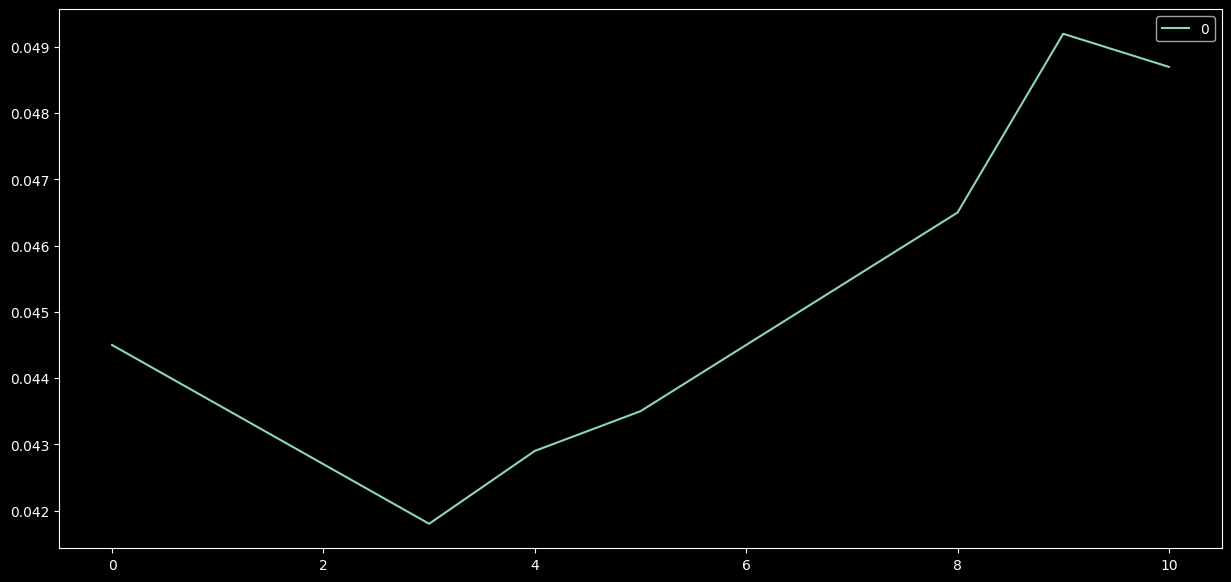

In [ ]:
pd.DataFrame(obb.fixedincome.government.treasury_rates(start_date='2025-01-23', end_date='2025-01-26', provider='federal_reserve').to_dataframe().values[0]).plot()

<Axes: >

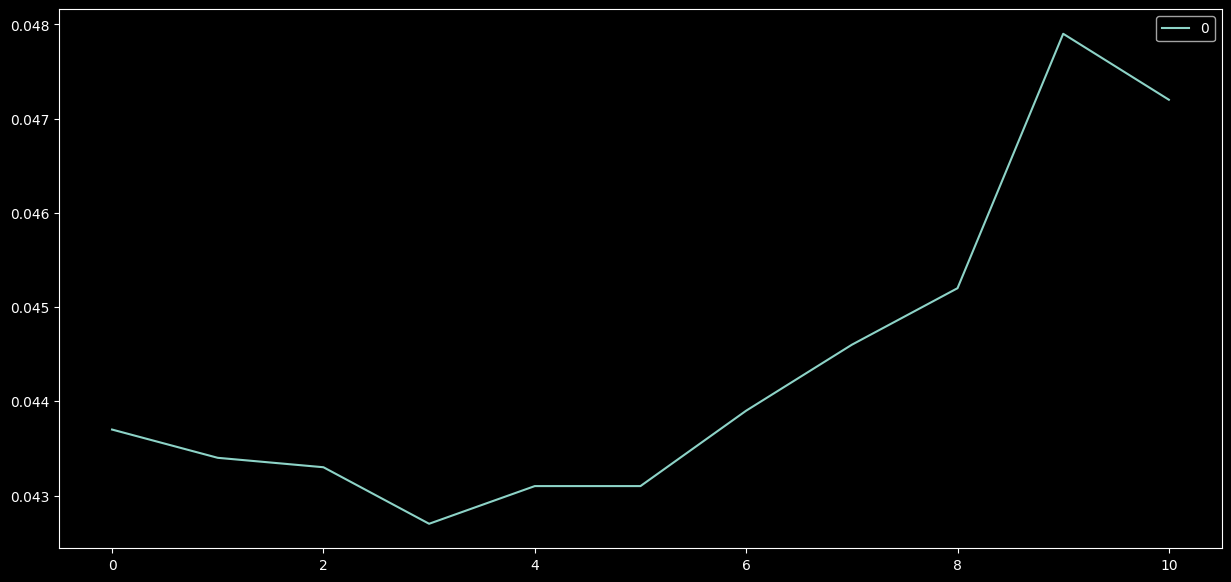

In [31]:
today = datetime.date.today().strftime("%Y-%m-%d")
libs.utils.add_to_date(today, {"days": -5})
pd.DataFrame(obb.fixedincome.government.treasury_rates(start_date=libs.utils.add_to_date(today, {"days": -5}), end_date=today, provider='federal_reserve').to_dataframe().tail(1).values[0]).plot()

In [533]:
trates[['month_3', 'month_6', 'year_1', 'year_2', 'year_3', 'year_5', 'year_7', 'year_10', 'year_20', 'year_30']]

,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30
date,,,,,,,,,,
1999-01-04,0.0449,0.0457,0.0458,0.0458,0.0457,0.0457,0.0475,0.0469,0.0542,0.0515
1999-01-05,0.0448,0.0457,0.0456,0.0464,0.0464,0.0462,0.0480,0.0474,0.0548,0.0521
1999-01-06,0.0447,0.0455,0.0453,0.0462,0.0462,0.0461,0.0476,0.0473,0.0542,0.0517
1999-01-07,0.0444,0.0449,0.0451,0.0463,0.0463,0.0462,0.0482,0.0477,0.0548,0.0523
1999-01-08,0.0448,0.0453,0.0457,0.0471,0.0471,0.0472,0.0492,0.0486,0.0557,0.0526
...,...,...,...,...,...,...,...,...,...,...
2008-12-24,0.0000,0.0023,0.0040,0.0090,0.0114,0.0154,0.0183,0.0220,0.0294,0.0263
2008-12-26,0.0003,0.0023,0.0038,0.0089,0.0108,0.0151,0.0180,0.0216,0.0291,0.0261
2008-12-29,0.0006,0.0025,0.0036,0.0078,0.0096,0.0145,0.0175,0.0213,0.0294,0.0263


In [534]:
import numpy as np

def calc_sma_trates(row):
    values = row.values
    avg = [ (values[i+1] + values[i])/2.0 for i in range(len(values)-1)]
    avg_cols = [ str(i) for i in range(len(avg)) ]
    return pd.Series(avg, index=avg_cols)

def calc_linear_reg_params( row ):
    values = row if type(row) == list else row.values        
    y = np.array( values )
    x = np.array([ i for i in range(len(y)) ])
    
    slope, intercept = np.polyfit(x, y, 1)
    
    y_pred = [ slope * _x + intercept for _x in x ]
    
    rss = sum([ abs(_y - _yp)**2 for _y, _yp in zip(y, y_pred) ])
    return pd.Series([ slope, intercept, rss ], index=['A', 'B', 'C'])

def find_coeffients(row):
    values = row.values
    y = np.array( values )
    x = np.array([ 0.1*i for i in range(len(y)) ])
    
    coefficients = list( np.polyfit(x, y, 2) )
    return pd.Series(coefficients, index=['A', 'B', 'C'])
    
#trates[['slope', 'intercept', 'rss']] = trates.apply(calc_linear_reg_params, axis=1)
#trates[trates.index == datetime.date(1999,1,7)].apply(find_curve_params, axis=1)
#trates[['A', 'B', 'C']] = trates[ ['month_3', 'month_6', 'year_1', 'year_2', 'year_3', 'year_5', 'year_7', 'year_10', 'year_20', 'year_30'] ].apply(find_coeffients, axis=1)
#trates[['slope', 'intercept', 'rss']] = trates[ [ str(i) for i in range(9) ] ].apply(find_coeffients, axis=1)
#trates['C'] = trates['C'].round(3)

trates[ [ str(i) for i in range(9) ] ] = trates[ ['month_3', 'month_6', 'year_1', 'year_2', 'year_3', 'year_5', 'year_7', 'year_10', 'year_20', 'year_30'] ].apply(calc_sma_trates, axis=1)
trates[['A', 'B', 'C']] = trates[ [ str(i) for i in range(9) ] ].apply(find_coeffients, axis=1)

In [535]:
trates

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30,0,1,2,3,4,5,6,7,8,A,B,C
date,,,,,,,,,,,,,,,,,,,,,,,
1999-01-04,0.0000,0.0449,0.0457,0.0458,0.0458,0.0457,0.0457,0.0475,0.0469,0.0542,0.0515,0.04530,0.04575,0.04580,0.04575,0.04570,0.04660,0.04720,0.05055,0.05285,0.021034,-0.008785,0.046024
1999-01-05,0.0000,0.0448,0.0457,0.0456,0.0464,0.0464,0.0462,0.0480,0.0474,0.0548,0.0521,0.04525,0.04565,0.04600,0.04640,0.04630,0.04710,0.04770,0.05110,0.05345,0.019021,-0.006341,0.045886
1999-01-06,0.0000,0.0447,0.0455,0.0453,0.0462,0.0462,0.0461,0.0476,0.0473,0.0542,0.0517,0.04510,0.04540,0.04575,0.04620,0.04615,0.04685,0.04745,0.05075,0.05295,0.018182,-0.005962,0.045664
1999-01-07,0.0000,0.0444,0.0449,0.0451,0.0463,0.0463,0.0462,0.0482,0.0477,0.0548,0.0523,0.04465,0.04500,0.04570,0.04630,0.04625,0.04720,0.04795,0.05125,0.05355,0.017278,-0.003864,0.045168
1999-01-08,0.0000,0.0448,0.0453,0.0457,0.0471,0.0471,0.0472,0.0492,0.0486,0.0557,0.0526,0.04505,0.04550,0.04640,0.04710,0.04715,0.04820,0.04890,0.05215,0.05415,0.014681,-0.001336,0.045496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,0.0000,0.0000,0.0023,0.0040,0.0090,0.0114,0.0154,0.0183,0.0220,0.0294,0.0263,0.00115,0.00315,0.00650,0.01020,0.01340,0.01685,0.02015,0.02570,0.02785,0.007890,0.028422,0.000726
2008-12-26,0.0001,0.0003,0.0023,0.0038,0.0089,0.0108,0.0151,0.0180,0.0216,0.0291,0.0261,0.00130,0.00305,0.00635,0.00985,0.01295,0.01655,0.01980,0.02535,0.02760,0.009848,0.026405,0.000850
2008-12-29,0.0004,0.0006,0.0025,0.0036,0.0078,0.0096,0.0145,0.0175,0.0213,0.0294,0.0263,0.00155,0.00305,0.00570,0.00870,0.01205,0.01600,0.01940,0.02535,0.02785,0.017348,0.020588,0.001127


In [536]:
#trates.to_csv('trates.csv', index=False)

<Axes: >

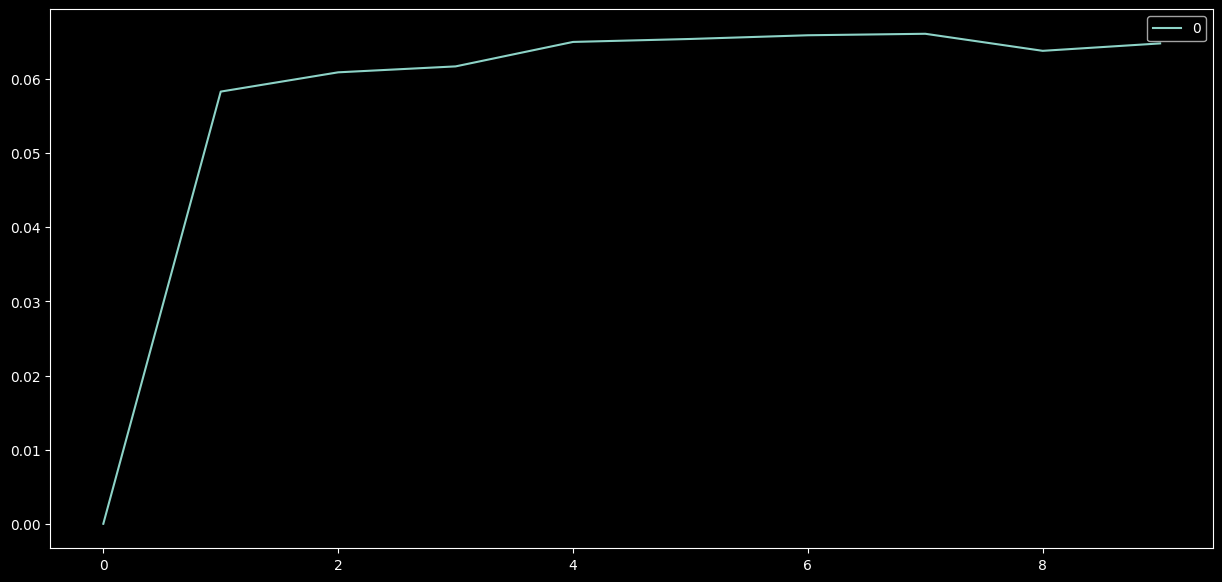

In [537]:
pd.DataFrame([ v for v in trates[trates.index == datetime.date(2000,3,8)].values[0][0:10] ]).plot()

<Axes: >

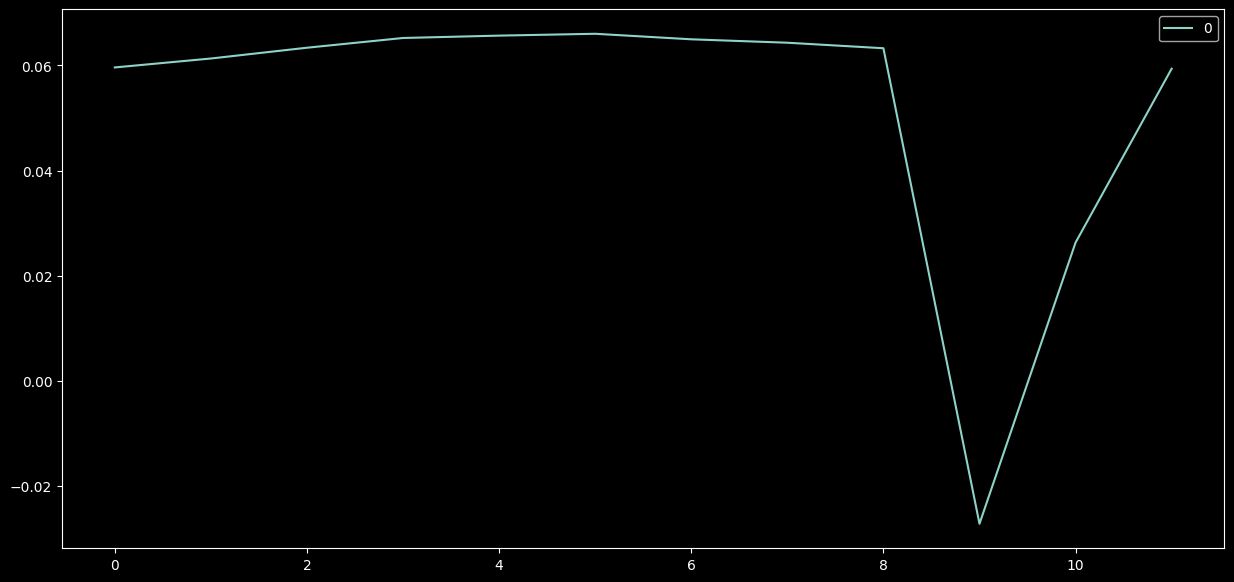

In [538]:
pd.DataFrame([ v for v in trates[trates.index == datetime.date(2000,3,8)].values[0][11:] ]).plot()

In [554]:
df = trates[['B', 'C']].copy(deep=True)
#df = trates[['A', 'B']].copy(deep=True)
#df = trates[['slope', 'intercept', 'rss']].copy(deep=True)

<Axes: xlabel='C', ylabel='B'>

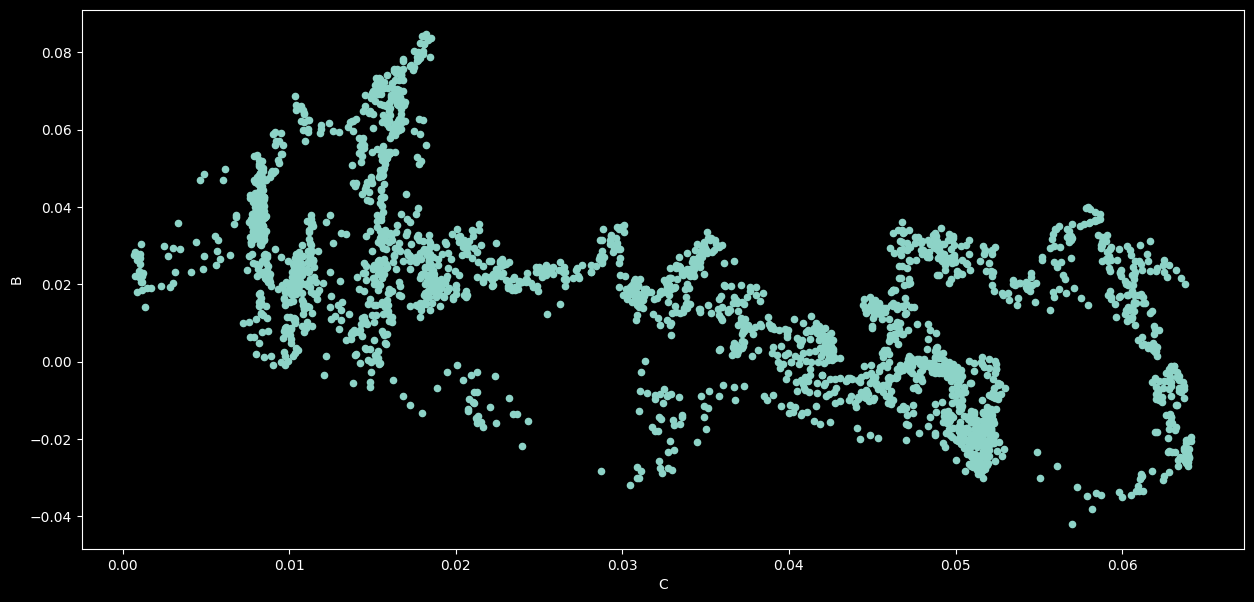

In [555]:
df.plot.scatter('C', 'B')

In [546]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

# pca = PCA(n_components=2)  # Reduce to 2 principal components
# pca_data = pca.fit_transform(scaled_data)
# #pca_data = pca.fit_transform(df)

# # Step 3: Create a DataFrame with the PCA results
# pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# print("Explained variance ratio:", pca.explained_variance_ratio_)

# pca_df.index = trates.index.copy(deep=True)
# trates[['PC1', 'PC2']] = pca_df

Explained variance ratio: [0.54390509 0.44695959]


In [556]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=1)  # Reduce to 2 principal components
pca_data = pca.fit_transform(scaled_data)
#pca_data = pca.fit_transform(df)

# Step 3: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_data, columns=['PC'])

print("Explained variance ratio:", pca.explained_variance_ratio_)

pca_df.index = trates.index.copy(deep=True)
trates['PC1'] = range(len(pca_df))
trates['PC2'] = pca_df['PC']

Explained variance ratio: [0.80036944]


In [557]:
pca_df

,PC
date,
1999-01-04,1.242762
1999-01-05,1.165410
1999-01-06,1.145628
1999-01-07,1.064659
1999-01-08,1.002801
...,...
2008-12-24,-1.603187
2008-12-26,-1.538948
2008-12-29,-1.356821


In [558]:
trates

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30,0,1,2,3,4,5,6,7,8,A,B,C,PC1,PC2
date,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-04,0.0000,0.0449,0.0457,0.0458,0.0458,0.0457,0.0457,0.0475,0.0469,0.0542,0.0515,0.04530,0.04575,0.04580,0.04575,0.04570,0.04660,0.04720,0.05055,0.05285,0.021034,-0.008785,0.046024,0,1.242762
1999-01-05,0.0000,0.0448,0.0457,0.0456,0.0464,0.0464,0.0462,0.0480,0.0474,0.0548,0.0521,0.04525,0.04565,0.04600,0.04640,0.04630,0.04710,0.04770,0.05110,0.05345,0.019021,-0.006341,0.045886,1,1.165410
1999-01-06,0.0000,0.0447,0.0455,0.0453,0.0462,0.0462,0.0461,0.0476,0.0473,0.0542,0.0517,0.04510,0.04540,0.04575,0.04620,0.04615,0.04685,0.04745,0.05075,0.05295,0.018182,-0.005962,0.045664,2,1.145628
1999-01-07,0.0000,0.0444,0.0449,0.0451,0.0463,0.0463,0.0462,0.0482,0.0477,0.0548,0.0523,0.04465,0.04500,0.04570,0.04630,0.04625,0.04720,0.04795,0.05125,0.05355,0.017278,-0.003864,0.045168,3,1.064659
1999-01-08,0.0000,0.0448,0.0453,0.0457,0.0471,0.0471,0.0472,0.0492,0.0486,0.0557,0.0526,0.04505,0.04550,0.04640,0.04710,0.04715,0.04820,0.04890,0.05215,0.05415,0.014681,-0.001336,0.045496,4,1.002801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,0.0000,0.0000,0.0023,0.0040,0.0090,0.0114,0.0154,0.0183,0.0220,0.0294,0.0263,0.00115,0.00315,0.00650,0.01020,0.01340,0.01685,0.02015,0.02570,0.02785,0.007890,0.028422,0.000726,2497,-1.603187
2008-12-26,0.0001,0.0003,0.0023,0.0038,0.0089,0.0108,0.0151,0.0180,0.0216,0.0291,0.0261,0.00130,0.00305,0.00635,0.00985,0.01295,0.01655,0.01980,0.02535,0.02760,0.009848,0.026405,0.000850,2498,-1.538948
2008-12-29,0.0004,0.0006,0.0025,0.0036,0.0078,0.0096,0.0145,0.0175,0.0213,0.0294,0.0263,0.00155,0.00305,0.00570,0.00870,0.01205,0.01600,0.01940,0.02535,0.02785,0.017348,0.020588,0.001127,2499,-1.356821


<Axes: xlabel='PC1', ylabel='PC2'>

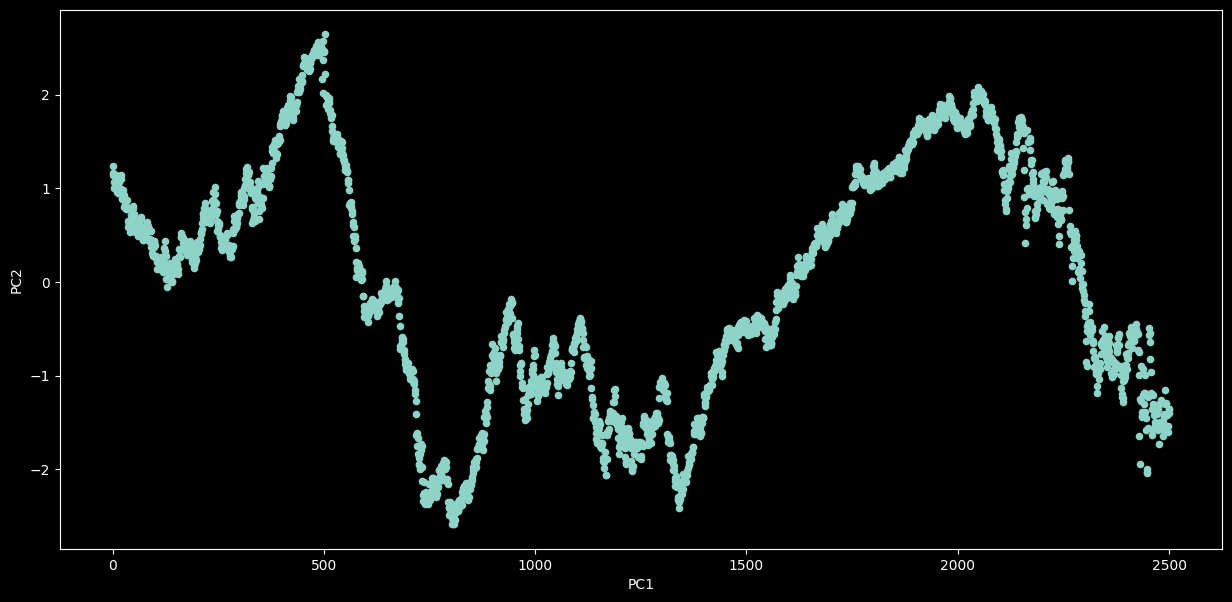

In [559]:
trates.plot.scatter('PC1', 'PC2')

In [560]:
trates.reset_index().to_csv('../data/trates_1999_2001.csv', index=False)

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30,slope,intercept,rss,A,B,C,0,1,2,3,4,5,6,7,8,PC1,PC2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-04-20,NaN,0.0579,0.06,0.0612,0.0638,0.0633,0.0624,0.0625,0.0599,0.0616,0.0583,NaN,NaN,NaN,-0.022722,0.018302,0.06,0.05895,0.0606,0.0625,0.06355,0.06285,0.06245,0.0612,0.06075,0.05995,1.259678,-1.118827


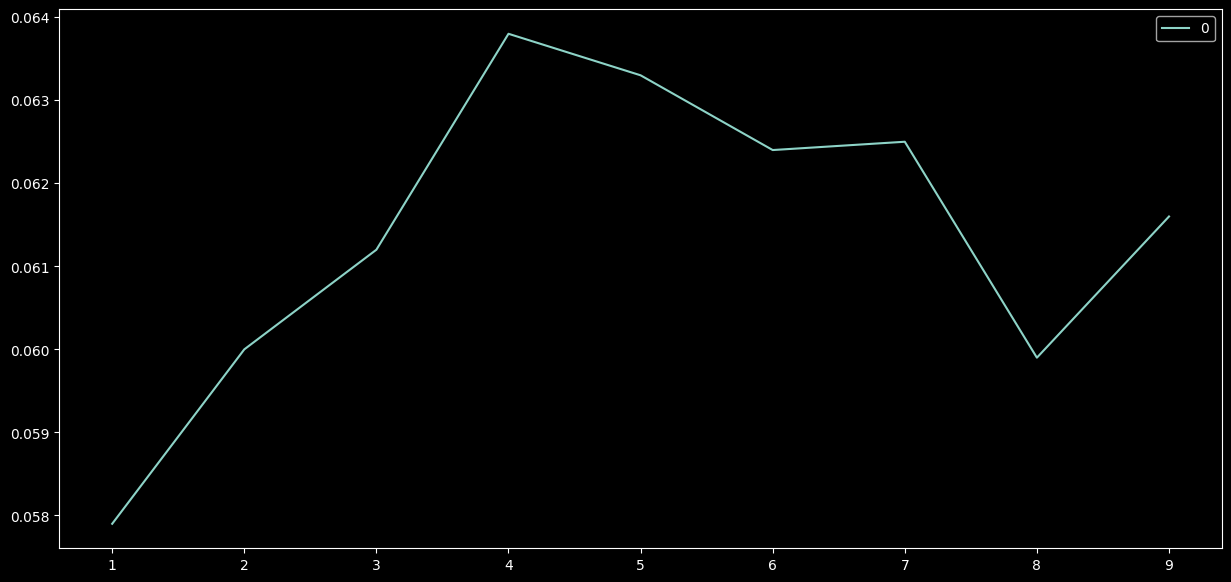

In [302]:
d = datetime.date(2000, 4, 20)

pd.DataFrame([ v for v in trates[trates.index == d].values[0][0:10] ]).plot()
display(trates[trates.index == d])

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30,slope,intercept,rss,A,B,C,0,1,2,3,4,5,6,7,8,PC1,PC2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-06-02,NaN,0.0587,0.0625,0.0623,0.0652,0.0648,0.0637,0.0639,0.0615,0.0631,0.0594,NaN,NaN,NaN,-0.021807,0.017279,0.06,0.0606,0.0624,0.06375,0.065,0.06425,0.0638,0.0627,0.0623,0.06125,1.197194,-1.116664


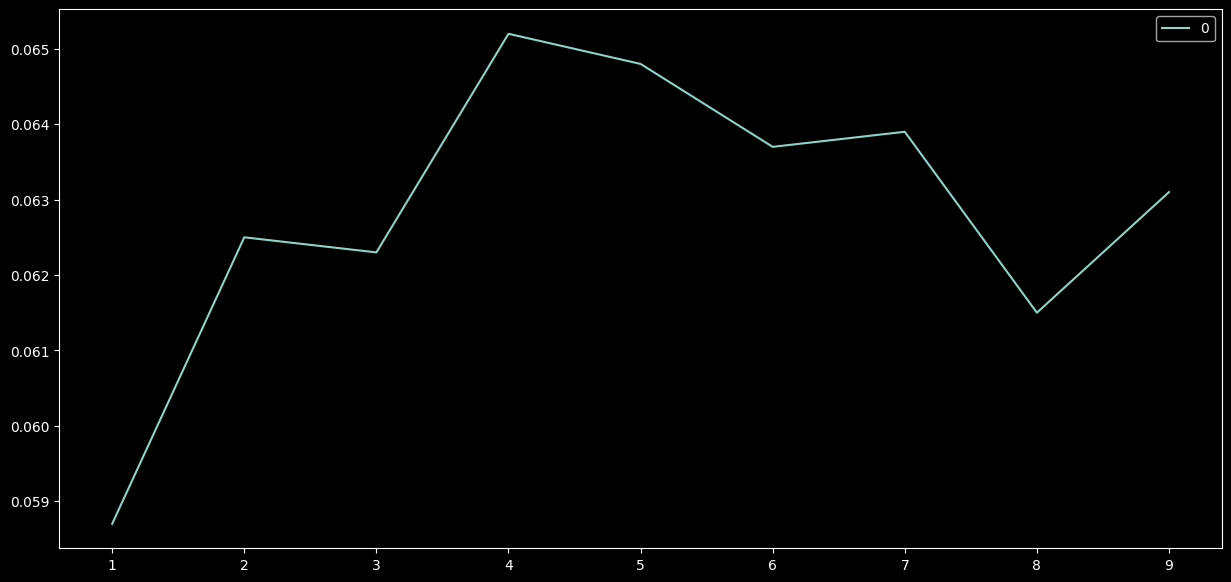

In [303]:
d = datetime.date(2000, 6, 2)

pd.DataFrame([ v for v in trates[trates.index == d].values[0][0:10] ]).plot()
display(trates[trates.index == d])

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30,slope,intercept,rss,A,B,C,0,1,2,3,4,5,6,7,8,PC1,PC2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-10-24,NaN,0.0635,0.0634,0.0597,0.0586,0.0577,0.057,0.0571,0.0563,0.0593,0.0571,NaN,NaN,NaN,0.022668,-0.024509,0.06,0.06345,0.06155,0.05915,0.05815,0.05735,0.05705,0.0567,0.0578,0.0582,-1.606498,-0.77635


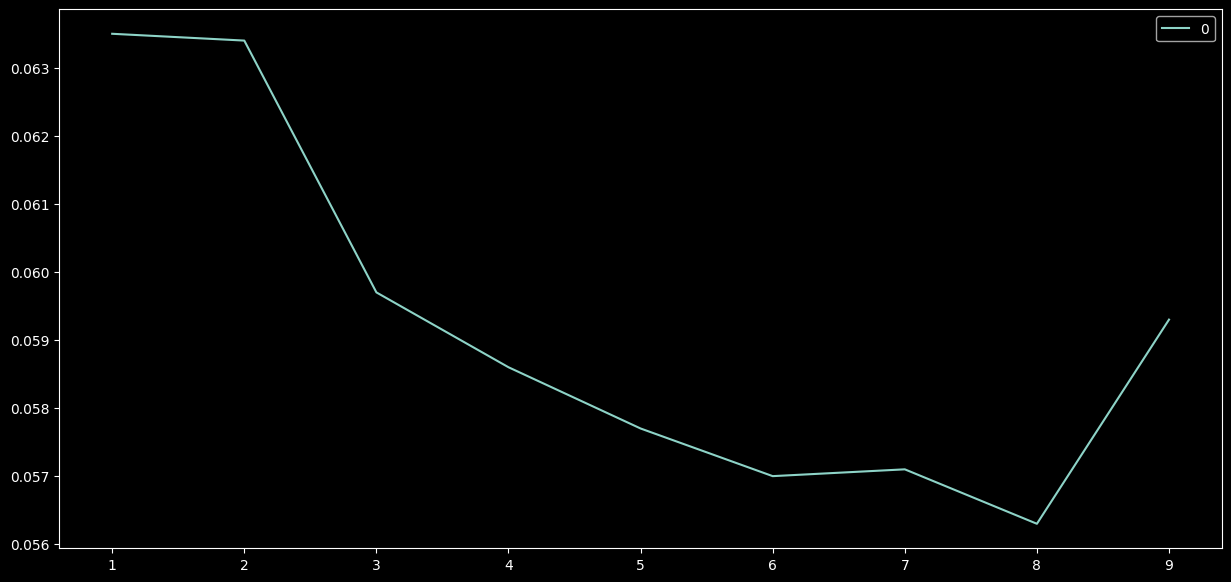

In [304]:
d = datetime.date(2000, 10, 24)

pd.DataFrame([ v for v in trates[trates.index == d].values[0][0:10] ]).plot()
display(trates[trates.index == d])

,month_1,month_3,month_6,year_1,year_2,year_3,year_5,year_7,year_10,year_20,year_30,slope,intercept,rss,A,B,C,0,1,2,3,4,5,6,7,8,PC1,PC2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-04-20,NaN,0.0438,0.0454,0.0467,0.0495,0.0503,0.0506,0.0525,0.0516,0.0579,0.0552,NaN,NaN,NaN,0.000319,0.013653,0.04,0.0446,0.04605,0.0481,0.0499,0.05045,0.05155,0.05205,0.05475,0.05655,0.308231,-0.441466


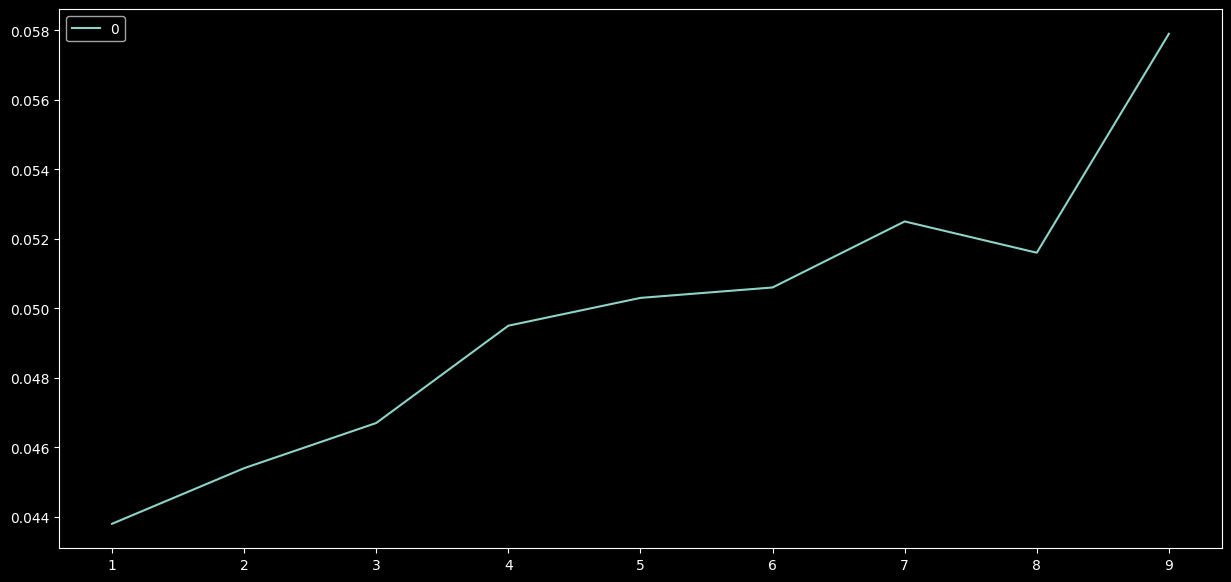

In [305]:
d = datetime.date(1999, 4, 20)

pd.DataFrame([ v for v in trates[trates.index == d].values[0][0:10] ]).plot()
display(trates[trates.index == d])

In [306]:
import pandas as pd
trates = pd.read_csv('../data/trates_1999_2001.csv')
trates = trates[ ['date', 'month_3', 'month_6', 'year_1', 'year_2', 'year_3', 'year_5', 'year_7', 'year_10', 'year_20', 'year_30'] ]
trates.set_index('date', inplace=True)

In [307]:
trates.columns

Index(['month_3', 'month_6', 'year_1', 'year_2', 'year_3', 'year_5', 'year_7',
       'year_10', 'year_20', 'year_30'],
      dtype='object')

In [ ]:
import libs.utils as utils
filePath=r'C:\Users\User\Desktop\projects\trading\data\trates_1999_2001.csv'
df = pd.read_csv( filePath )
dfscatter = df[ ['PC1','PC2'] ].copy(deep=True)
dfline = df[ ['month_3','month_6','year_1','year_2','year_3','year_5','year_7','year_10','year_20','year_30'] ].copy(deep=True)

utils.plot_scatter_line_comp( dfscatter=dfscatter, dfline=dfline)